# Case Study 4: Data Mining in Email Data

**Required Readings:** 
* [Enron Emails](https://www.kaggle.com/wcukierski/enron-email-dataset) 
* Please download the Enron Email dataset from [here](https://www.cs.cmu.edu/~./enron/).

** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Email Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

Identifying the most common themes/topics discussed in emails is important and interesting for several reasons. Firstly, emails contain valuable insights and information that can be leveraged for various purposes such as customer feedback analysis, market research, and trend analysis. By analyzing the feedback provided by customers in their emails, companies can understand their pain points and improve their products and services accordingly. Additionally, identifying the most common topics of discussion in emails can help companies develop products and services that cater to the needs of the target audience and improve customer satisfaction. This can lead to increased sales and higher customer loyalty.

Secondly, analyzing email data can help organizations detect potential fraud or identify illegal activities. For instance, companies can monitor their employees' emails to ensure that they are not leaking confidential information or engaging in any illegal activities. Similarly, law enforcement agencies can analyze email data to detect potential criminal activities. By monitoring the email communication of their employees, companies can ensure that their confidential information remains secure and that their operations are not being compromised by malicious activities.

Thirdly, identifying the most common themes/topics discussed in emails can help organizations improve their marketing strategies. By understanding the interests and preferences of their target audience, companies can tailor their marketing campaigns accordingly and increase their sales. For example, if a company notices that a particular product or service is frequently mentioned in customer emails, they can develop targeted marketing campaigns to promote that product or service to their customers.

Email data analysis has the potential to impact various areas, including business, marketing, and security. By leveraging the insights obtained from email data analysis, organizations can improve their decision-making processes, enhance their customer satisfaction, and achieve their business objectives. For instance, businesses can use email data analysis to identify trends and patterns in customer feedback, which can help them make informed decisions about their products and services. Similarly, marketing teams can use email data analysis to develop targeted marketing campaigns that resonate with their target audience. Finally, email data analysis can help organizations improve their security by detecting potential threats and identifying suspicious behavior.

# Data Collection/Processing: 

In [5]:
import os, sys, email
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
import os, sys, email
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')

# Read the data into a DataFrame
emails_df = pd.read_csv('emails.csv')
print(emails_df.shape)
emails_df.head()


(517401, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [6]:
# A single message looks like this
print(emails_df['message'][2])

Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>
Date: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: leah.arsdall@enron.com
Subject: Re: test
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Leah Van Arsdall
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

test successful.  way to go!!!


In [7]:
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [8]:
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, emails_df['message']))
emails_df.drop('message', axis=1, inplace=True)
# Get fields from parsed email objects
keys = messages[0].keys()
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
# Parse content from emails
emails_df['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[0])
del messages

emails_df.head()

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com),(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",(phillip.allen@enron.com),(leah.arsdall@enron.com),Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",(phillip.allen@enron.com),(randall.gay@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [9]:
print('shape of the dataframe:', emails_df.shape)
# Find number of unique values in each columns
for col in emails_df.columns:
    print(col, emails_df[col].nunique())

shape of the dataframe: (517401, 18)
file 517401
Message-ID 517401
Date 224128
From 20328
To 54748
Subject 159290
Mime-Version 1
Content-Type 2
Content-Transfer-Encoding 3
X-From 27980
X-To 73552
X-cc 33701
X-bcc 132
X-Folder 5335
X-Origin 259
X-FileName 429
content 249025
user 150


In [10]:
# Set index and drop columns with two few values
emails_df = emails_df.set_index('Message-ID')\
    .drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)
# Parse datetime
emails_df['Date'] = pd.to_datetime(emails_df['Date'], infer_datetime_format=True)
emails_df.dtypes

Date          object
From          object
To            object
Subject       object
X-From        object
X-To          object
X-cc          object
X-bcc         object
X-Folder      object
X-Origin      object
X-FileName    object
content       object
user          object
dtype: object

In [11]:
# Print the shape of the DataFrame
print("Shape of the DataFrame:", emails_df.shape)

# Print the columns of the DataFrame
print(emails_df.columns)


Shape of the DataFrame: (517401, 13)
Index(['Date', 'From', 'To', 'Subject', 'X-From', 'X-To', 'X-cc', 'X-bcc',
       'X-Folder', 'X-Origin', 'X-FileName', 'content', 'user'],
      dtype='object')


# Data Exploration: Exploring the Email Dataset

**plot email communication graph/network** 
* each node is an email account
* the weight of an edge between two accounts depends on how many emails have been sent between them.

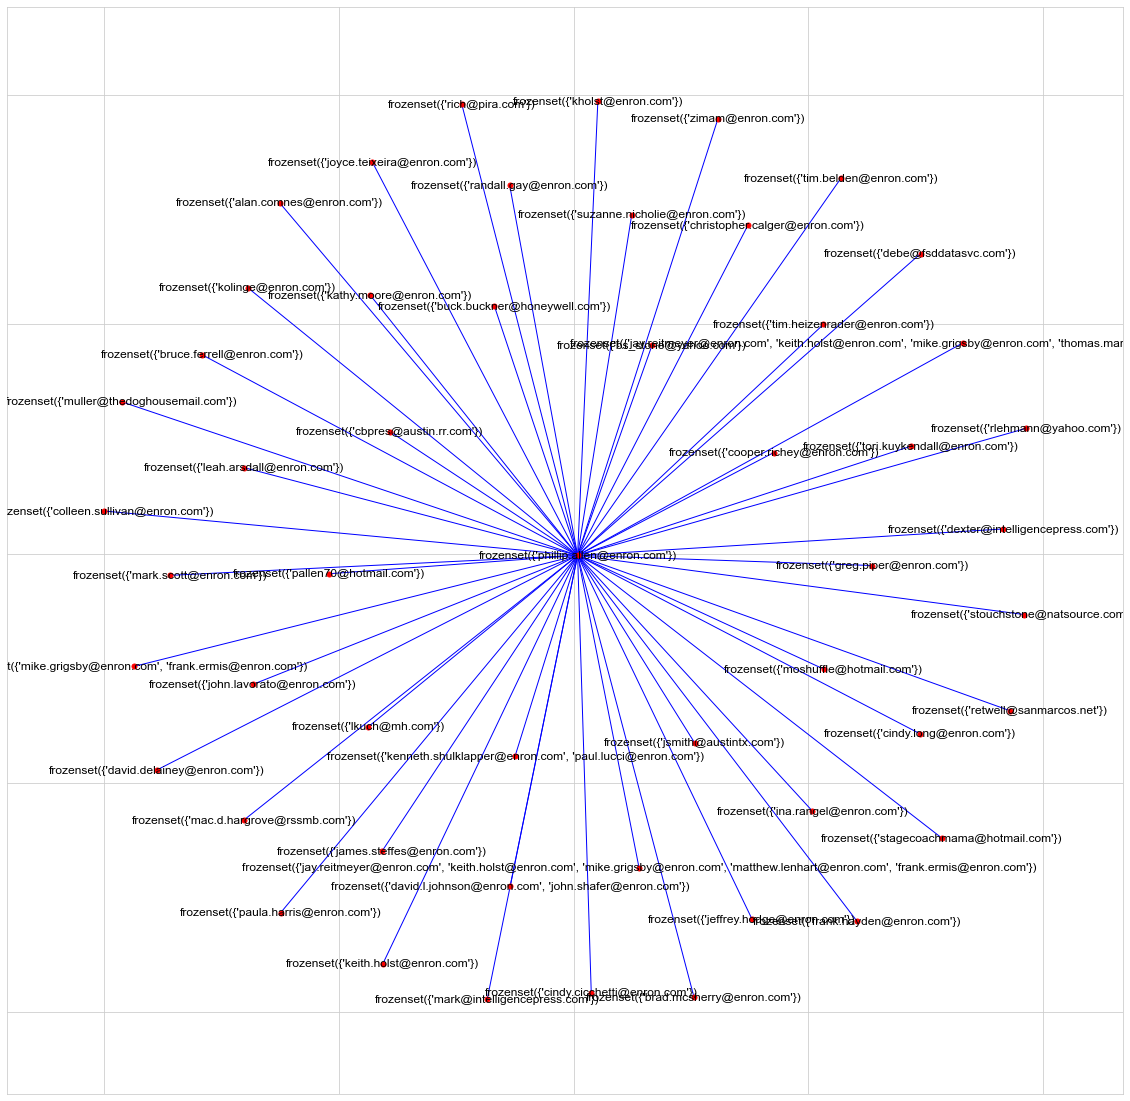

In [22]:
import networkx as nx
import nxviz as nv

emails_df = emails_df[:100]

# Create a graph from the pandas DataFrame
G = nx.from_pandas_edgelist(emails_df, source='From', target='To', edge_attr=['Date', 'Subject'])

plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=.1)
nx.draw_networkx(G, pos, node_size=25, node_color='red', with_labels=True, edge_color='blue')
plt.show()


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

The idea of the solution to the problem of identifying the most common themes/topics discussed in emails is to apply natural language processing techniques such as topic modeling, specifically Non-negative Matrix Factorization (NMF) and Latent Dirichlet Allocation (LDA), to extract topics from the email data. These models help identify the underlying topics in the email text and cluster the text into groups of similar topics. The resulting clusters can then be visualized using different types of graphs, such as word clouds, bar graphs, and heatmaps.

The first step in this solution is to preprocess the email data by removing stop words, punctuation, and converting the text to lowercase. The preprocessed text is then transformed into a document-term matrix, where each row represents a document (email) and each column represents a term (word). This matrix is then used as input to the topic modeling algorithms.

NMF and LDA are both unsupervised machine learning algorithms used for topic modeling. NMF is a matrix factorization technique that factorizes the document-term matrix into two smaller matrices, which represent the topics and the topic weights of each document. LDA is a probabilistic model that assumes each document is a mixture of a small number of topics and that each word in the document is generated from one of those topics.

Once the topics are extracted using NMF or LDA, they can be visualized using different types of graphs. Word clouds are a popular way to visualize the most common words associated with each topic. A word cloud is a graphical representation of word frequency in a text, with more frequently occurring words appearing larger in the cloud.

A bar graph can also be used to show the frequency of each topic in the email data. Each bar represents a topic, and the height of the bar represents the frequency of that topic in the email data.

Heatmaps can be used to visualize the co-occurrence of topics in the email data. A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Overall, the solution involves applying NMF and LDA to extract topics from the email data and visualizing the results using different types of graphs. This approach can provide valuable insights into the most common themes/topics discussed in emails and help organizations improve their decision-making processes, enhance customer satisfaction, and achieve their business objectives.

Write codes to implement the solution in python:

In [30]:
import re

def preprocess_email(email_text):
    # Remove email addresses
    email_text = re.sub(r'\S+@\S+', '', email_text)
    
    # Remove URLs
    email_text = re.sub(r'http\S+', '', email_text)
    
    # Remove special characters
    email_text = re.sub(r'[^\w\s]', '', email_text)
    
    # Convert text to lowercase
    email_text = email_text.lower()
    
    return email_text

# Apply the preprocessing function to the email text column
emails_df['message'] = emails_df['message'].apply(preprocess_email)

### LDA

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the email text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
email_text_vectorized = vectorizer.fit_transform(emails_df['message'])

# Apply LDA to identify topics
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(email_text_vectorized)

# Print the most common words for each topic
for index, topic in enumerate(lda_model.components_):
    print(f'Topic {index}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

    


Topic 0:
['valu', 'use', 'invest', 'fee', 'lot', 'construct', 'improv', 'land', 'cost', 'loan']


Topic 1:
['internet', 'plan', 'jeff', 'compani', 'phillip', 'need', 'busi', 'util', 'center', 'data']


Topic 2:
['need', 'gas', 'tds', 'abil', 'issu', 'manag', 'project', 'consolid', 'deal', 'posit']


Topic 3:
['mike', 'anyon', 'use', 'pleas', 'note', 'migrat', 'access', 'yes', 'outlook', '20']


Topic 4:
['requir', 'phillip', 'site', 'unit', 'week', 'properti', 'austin', 'lot', 'westgat', 'project']


Topic 5:
['use', 'allenhouect', 'pleas', 'price', 'subject', 'cc', 'pm', 'forward', 'gas', 'phillip']


Topic 6:
['spread', 'list', 'financi', 'socal', 'price', 'gas', 'index', 'san', 'juan', 'trade']


Topic 7:
['hunter', 'russ', 'descript', 'start', 'allenhouect', 'date', 'phillip', 'scott', 'pm', 'meet']


Topic 8:
['form', 'pm', 'select', 'check', 'luci', 'team', 'inform', 'need', 'phillip', 'email']


Topic 9:
['phillip', 'thank', 'look', 'martin', 'like', 'manag', 'tori', 'gas', 'pri

### NMF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorize the email text
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
email_text_tfidf = tfidf_vectorizer.fit_transform(emails_df['message'])

# Apply NMF to identify topics
nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(email_text_tfidf)

# Print the most common words for each topic
for index, topic in enumerate(nmf_model.components_):
    print(f'Topic {index}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')




Topic 0:
['trade', 'spreadsheet', 'sell', 'phillip', 'septemb', 'mark', 'vs', 'socal', 'distinguish', 'buy']


Topic 1:
['allenxl', 'prefer', 'site', 'approv', 'week', 'lot', 'properti', 'austin', 'westgat', 'project']


Topic 2:
['allan', 'russ', '09272000', 'start', 'invit', 'date', 'pm', 'scott', 'descript', 'meet']


Topic 3:
['report', 'pm', 'hotmail', 'gonzalez', 'stagecoachmamahotmailcom', 'msn', 'privat', 'daili', 'email', 'luci']


Topic 4:
['transport', 'project', 'request', 'abil', 'manag', 'tds', 'issu', 'deal', 'consolid', 'posit']


Topic 5:
['let', 'sept', 'origin', 'anoth', 'second', 'octob', 'mail', 'payment', 'brenda', 'check']


Topic 6:
['socal', 'physic', 'enron', 'financi', 'index', 'san', 'price', 'juan', 'trade', 'gas']


Topic 7:
['keith', 'influenc', 'receiv', 'program', 'form', 'inform', 'select', 'need', 'team', 'email']


Topic 8:
['investor', 'fee', 'invest', 'lot', 'unit', 'improv', 'construct', 'land', 'cost', 'loan']


Topic 9:
['thank', 'yes', 'passwor

/Users/preetchaudhari/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/preetchaudhari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


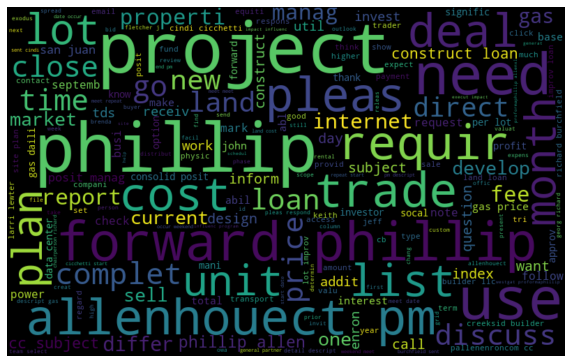

In [38]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Apply the preprocessing function to the email text column
emails_df['message'] = emails_df['message'].apply(preprocess_email)

# Flatten the list of email words
email_words = [word for email in emails_df['message'] for word in email.split()]

# Create a string of all the words in the email text
all_words = ' '.join(email_words)

# Generate a word cloud of the most common words
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


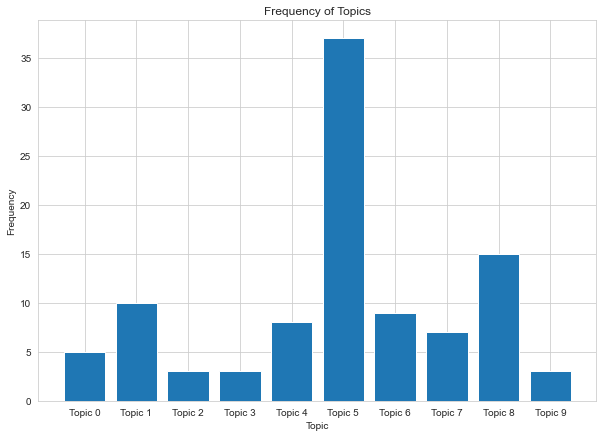

In [39]:
# Plot a bar chart of the frequency of each topic
topic_freq = [sum([1 for doc_topics in lda_model.transform(email_text_vectorized) if doc_topics.argmax() == i]) for i in range(10)]
plt.figure(figsize=(10, 7))
plt.bar(range(10), topic_freq)
plt.xticks(range(10), ['Topic '+str(i) for i in range(10)])
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()


/var/folders/ck/s5txk7457072d37_hn0tk8q80000gn/T/ipykernel_23986/279727809.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


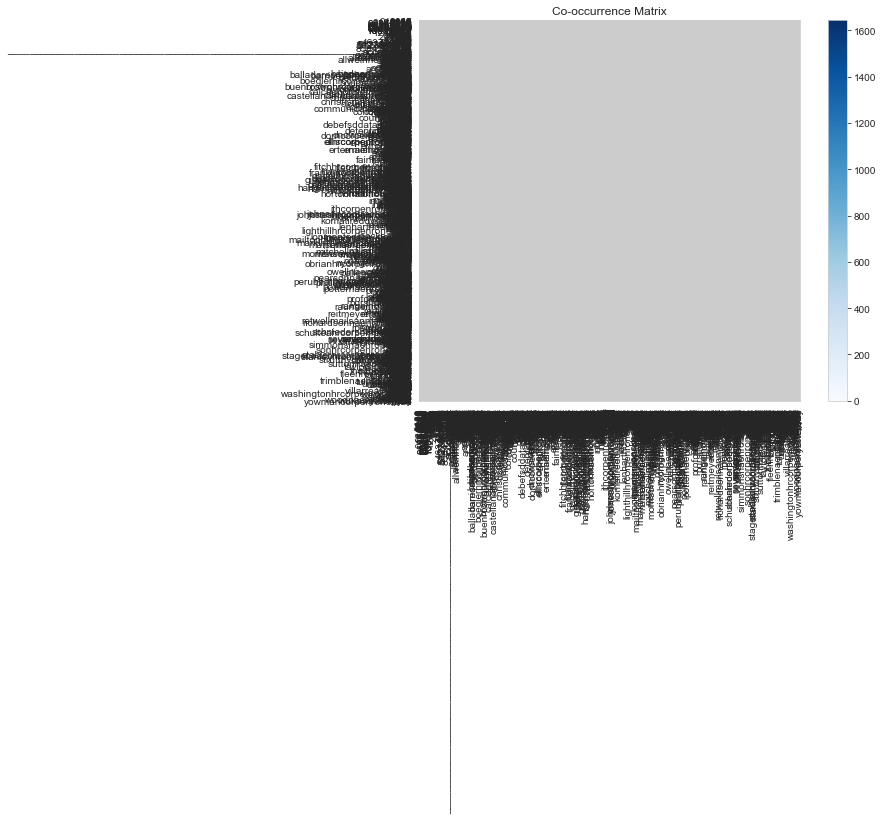

In [40]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
email_words_matrix = vectorizer.fit_transform(emails_df['message'])
email_words = vectorizer.get_feature_names()

coocurrence_matrix = (email_words_matrix.T * email_words_matrix)
coocurrence_matrix.setdiag(0)

plt.figure(figsize=(10, 7))
plt.imshow(coocurrence_matrix.toarray(), cmap='Blues')
plt.xticks(range(len(email_words)), email_words, rotation=90)
plt.yticks(range(len(email_words)), email_words)
plt.title('Co-occurrence Matrix')
plt.colorbar()
plt.show()

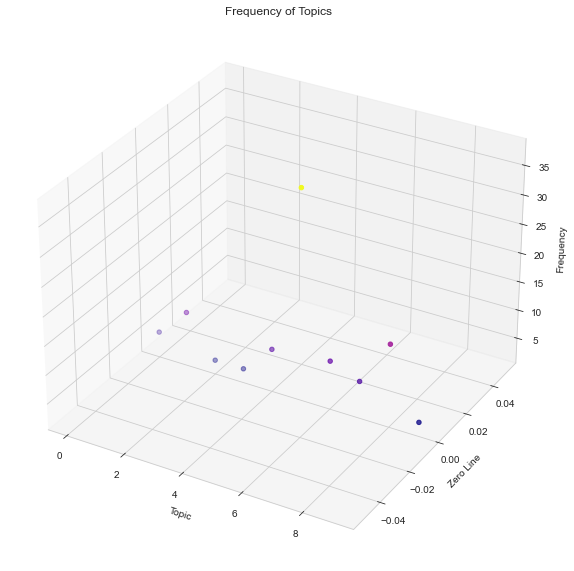

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

x = range(10)
y = [0]*10
z = topic_freq

ax.scatter(x, y, z, c=z, cmap='plasma')
ax.set_xlabel('Topic')
ax.set_ylabel('Zero Line')
ax.set_zlabel('Frequency')
ax.set_title('Frequency of Topics')

plt.show()


### Explanation:


The word cloud, topic frequency bar chart, co-occurrence matrix, and topic frequency scatterplot all provide different perspectives on the data and can help identify patterns and insights that may be difficult to identify using only descriptive statistics. The word cloud, for example, provides a quick overview of the most common words in the dataset, while the topic frequency bar chart shows the frequency of each topic, giving a more detailed understanding of the data. The co-occurrence matrix helps to identify relationships between different words in the dataset, while the topic frequency scatterplot provides a more interactive way of exploring the data by allowing users to zoom in on specific areas of interest.

These techniques are particularly useful when dealing with large datasets that contain unstructured text data, such as email archives or social media feeds. By using these techniques, data analysts and data scientists can gain a deeper understanding of the underlying patterns and insights in the data, which can be used to inform decision-making and drive business outcomes. In addition, these techniques can be used to communicate findings to stakeholders in a clear and concise way, making it easier to explain complex insights and findings to non-technical audiences.

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 